<img src="https://www.uss.cl/wp-content/themes/uss/img/logo.svg" width="200" height="200" style="float:left; padding:16px"/>

# **Actividad II**: Regresion Pólimonial.
Nicolás Abuhadba - agosto 2024.
- Unidad 4: Aprendizaje Supervisado.
- Ramo: Machine Learning Avanzado.
----------

#Regresión polinomial

En este notebook, probaremos la regresión polinomial usando el mismo dataset sobre diabetes.

Copiamos los primeros pasos del notebook anterior.

In [1]:
# Importamos algunas librerías generales
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

In [3]:
df_x = pd.DataFrame(X)
df_y = pd.DataFrame(y)

In [4]:
# agregamos los nombres de variables para una mejor visualización de los datos. Esto no es estrictamente necesario.
df_x.columns = diabetes.feature_names
df_x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


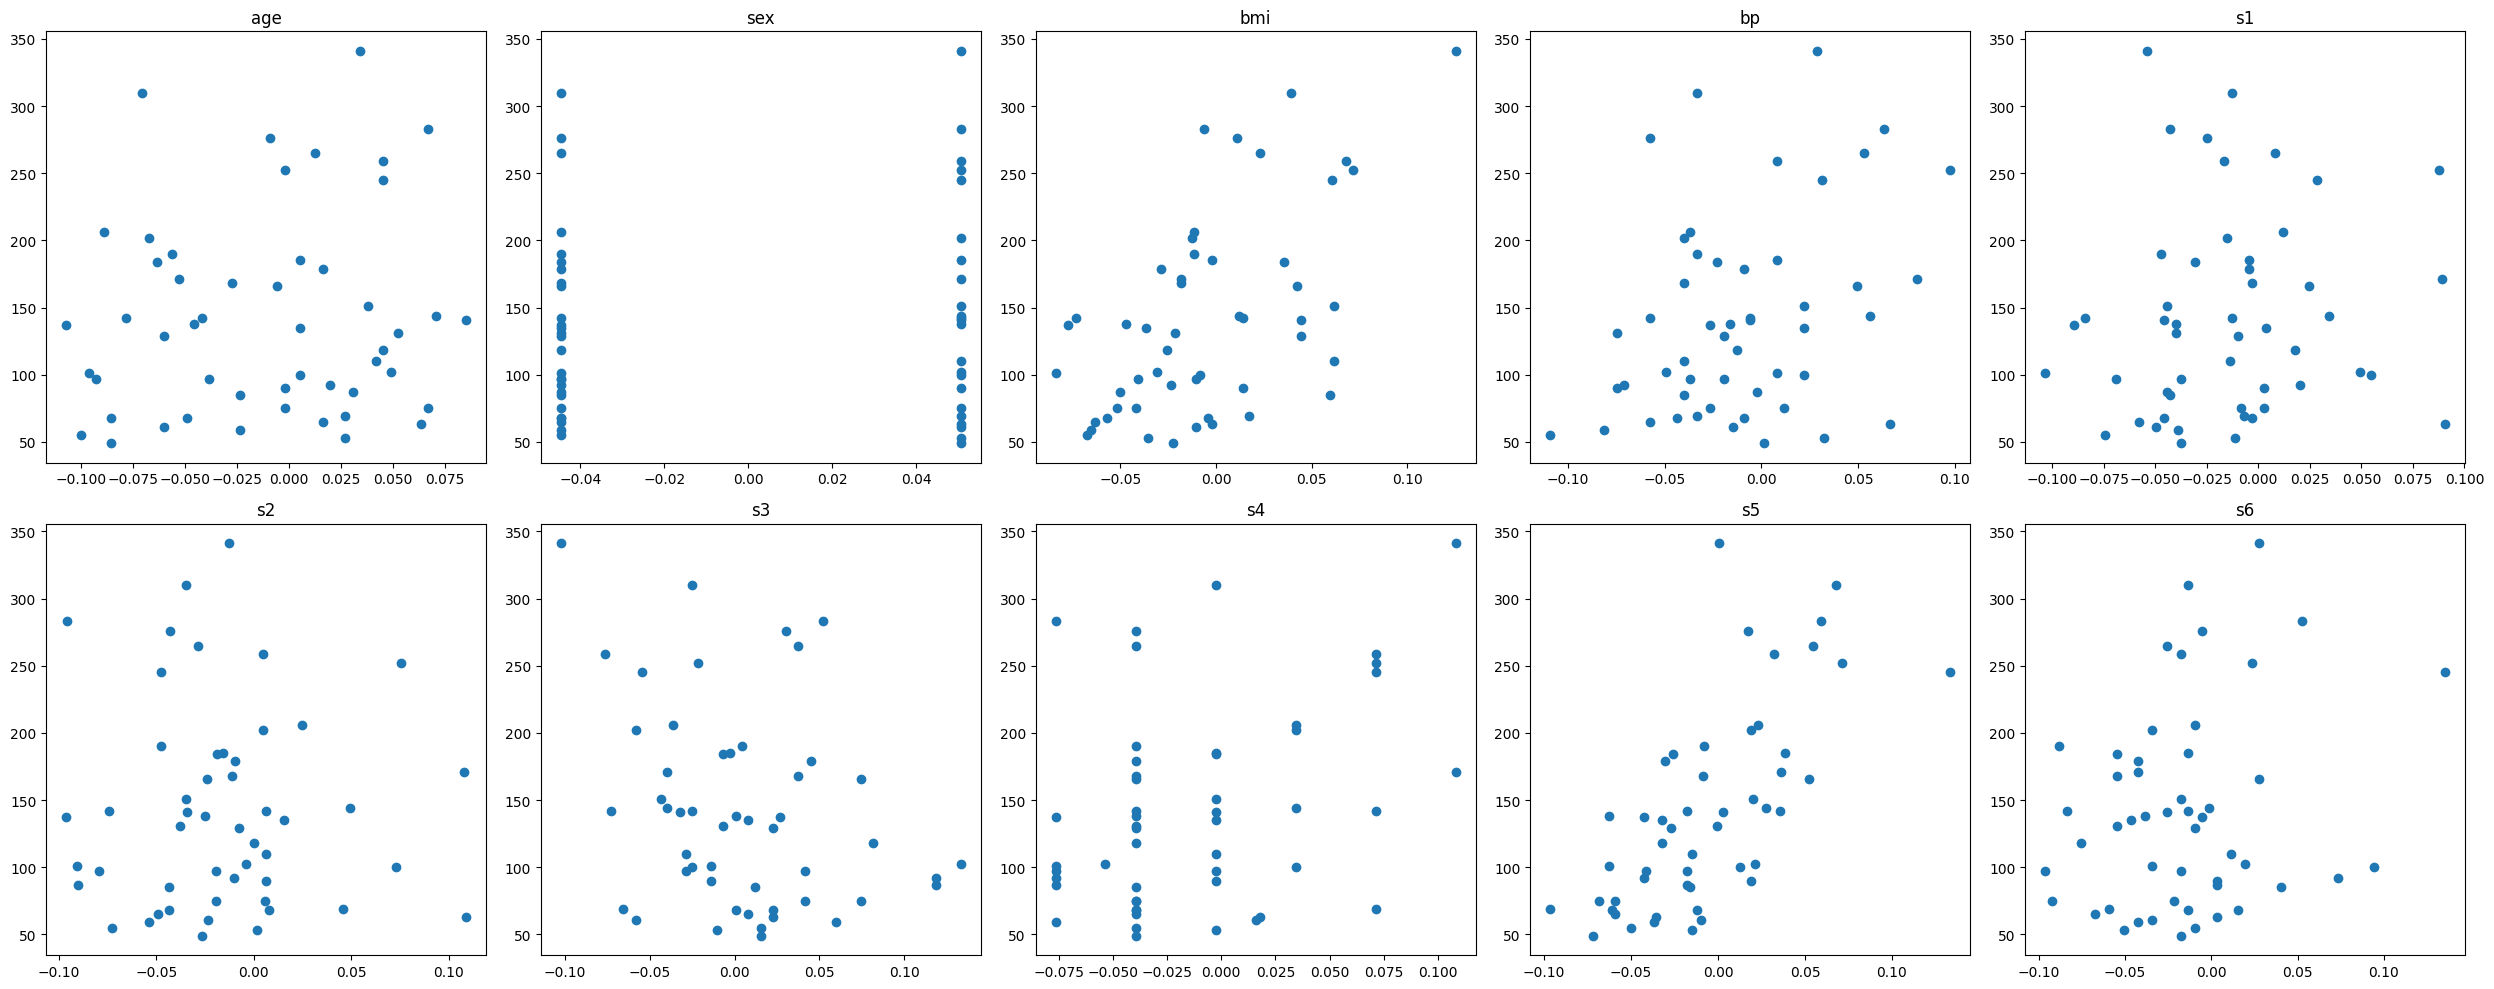

In [5]:
# Vemos la relación de cada variable con la variable Y
filas = 2
col = 5

nombres_col = diabetes.feature_names

# N es la cantidad de datos con los que trabajaremos. Se usa más adelante, atención!!
N = 50
fig, axs = plt.subplots(filas, col,figsize=(25,10))

n = 0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].set_title(nombres_col[n])
        axs[i,j].scatter(df_x[nombres_col[n]][:N],df_y[:N])
        n = n+1

fig.tight_layout()

##Ahora hacemos una regresión polinomial

Recomendamos que revisar las funciones: `PolynomialFeatures`, `np.polyval` y `np.flip`. Pueden servir para entender mejor que hace el código a continuación.

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
# Ojo con include_bias: por default es True y genera una columna con todos 1 (= x^0)
# Si dejamos esto en True, es conveniente pedirle luego al modelo lineal que no ajuste la ordenada al origen para evitar confusiones
grado_polinomio = 15
polyfeats = PolynomialFeatures(degree = grado_polinomio, include_bias = True)

In [30]:
# definimos con cual variable trabajaremos. LA MISMA PARA COMPARAR
var = 'bmi'
X = np.array(df_x[var][:N]).reshape(-1,1)

In [31]:
X_poly = polyfeats.fit_transform(X)

# Ver que tenemos columas x^0, x^1, x^2, x^3, x^4, x^5, ....etc
print(X_poly)

[[ 1.00000000e+00  6.16962065e-02  3.80642190e-03  2.34841792e-04
   1.44888477e-05  8.93906938e-07  5.51506671e-08  3.40258694e-09
   2.09926707e-10  1.29516815e-11  7.99069614e-13  4.92995639e-14
   3.04159608e-15  1.87654940e-16  1.15775979e-17  7.14293872e-19]
 [ 1.00000000e+00 -5.14740612e-02  2.64957898e-03 -1.36384591e-04
   7.02026877e-06 -3.61361745e-07  1.86007566e-08 -9.57456483e-10
   4.92841737e-11 -2.53685657e-12  1.30582311e-13 -6.72160185e-15
   3.45988145e-16 -1.78094150e-17  9.16722917e-19 -4.71874516e-20]
 [ 1.00000000e+00  4.44512133e-02  1.97591037e-03  8.78316133e-05
   3.90422178e-06  1.73547395e-07  7.71439229e-09  3.42914097e-10
   1.52429477e-11  6.77567520e-13  3.01186984e-14  1.33881269e-15
   5.95118484e-17  2.64537387e-18  1.17590078e-19  5.22702165e-21]
 [ 1.00000000e+00 -1.15950145e-02  1.34444361e-04 -1.55888432e-06
   1.80752863e-08 -2.09583207e-10  2.43012032e-12 -2.81772804e-14
   3.26715975e-16 -3.78827647e-18  4.39251206e-20 -5.09312411e-22
   5.90

Esta última variable tiene toda la información de x "y" sus potencias a incluir en el ajuste. Lo que queda es hacer una regresión múltiple de y con respecto a esta matriz de potencias de x.

In [32]:
## Creación y ajuste del modelo

# Creación del modelo lineal, idéntico al caso de una sola variable
# Al poner fit_intercept = False, todos los coeficientes del modelo están en el atributo ".coef_"
# Esto último es deseable si antes ponemos PolynomialFeatures(include_bias = True)

reg_poly = linear_model.LinearRegression(fit_intercept = False)

# Ajuste del modelo con los términos polinómicos
reg_poly.fit(X_poly, df_y[:N])

# Coeficientes del modelo, el orden corresponde a las columnas de X_poly
print('Coeficientes = {}'.format(reg_poly.coef_[0]))

Coeficientes = [ 1.33039368e+02 -1.44724379e+03  1.07710414e+05  9.50031832e+06
 -8.17494584e+07 -8.35183448e+09  8.12991406e+09  2.74163474e+12
  3.42461511e+12 -3.68917643e+14 -5.19070804e+14  1.66034107e+16
  5.13722784e+14  4.30248372e+14  2.03834257e+13  7.53055945e+12]


In [33]:
l_ordenada = list(df_x[var][:N])
l_ordenada.sort() # se ordenada para dibujar bien la curva
l_ordenada

[-0.08380842345522464,
 -0.07734155101193986,
 -0.07303030271641665,
 -0.06764124234701265,
 -0.06548561819925106,
 -0.06332999405148947,
 -0.05686312160820465,
 -0.051474061238800654,
 -0.050396249164919873,
 -0.047162812943277475,
 -0.041773752573873474,
 -0.040695940499992665,
 -0.03638469220446948,
 -0.035306880130588664,
 -0.03099563183506548,
 -0.028840007687303888,
 -0.02560657146566148,
 -0.023450947317899894,
 -0.022373135244019075,
 -0.0212953231701383,
 -0.018061886948495892,
 -0.018061886948495892,
 -0.012672826579091896,
 -0.011595014505211082,
 -0.011595014505211082,
 -0.010517202431330305,
 -0.010517202431330305,
 -0.008361578283568675,
 -0.006205954135807083,
 -0.004050329988045492,
 -0.0018947058402839008,
 -0.0018947058402839008,
 0.011039039046285686,
 0.012116851120166501,
 0.014272475267928093,
 0.014272475267928093,
 0.0175059114895705,
 0.022894971858974496,
 0.03582871674554409,
 0.039062152967186486,
 0.0422955891888289,
 0.04445121333659049,
 0.044451213336590

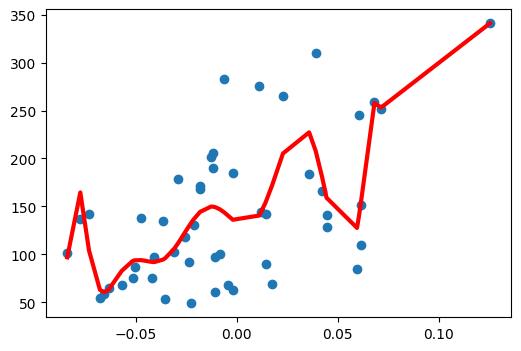

In [34]:
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
plt.scatter(X, df_y[:N])

# Relacion estimada
# (usamos np.flip que invierte el orden de los coeficientes, ya que polyval los toma en orden diferente a lo que devuelve reg.coef_)
y_estimado = np.polyval(np.flip(reg_poly.coef_[0]), l_ordenada)

ax.plot(l_ordenada, y_estimado, color = 'red', linewidth = 3)

#plt.xticks(())
#plt.yticks(())
#ax.set_ylim([0, 350])
#ax.set_xlim([-0.12, 0.01])
plt.show()

In [35]:
# Calidad del ajuste
print('Calidad de ajuste R^2 = {:.3f}'.format(reg_poly.score(X_poly, df_y[:N])))

Calidad de ajuste R^2 = 0.482


In [36]:
# mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(df_y[:N], y_estimado))

Mean squared error: 8006.20


In [37]:
# mean squared error
print('Mean squared error: %.2f'
      % mean_absolute_error(df_y[:N], y_estimado))

Mean squared error: 73.45


##Predecir valores nuevos

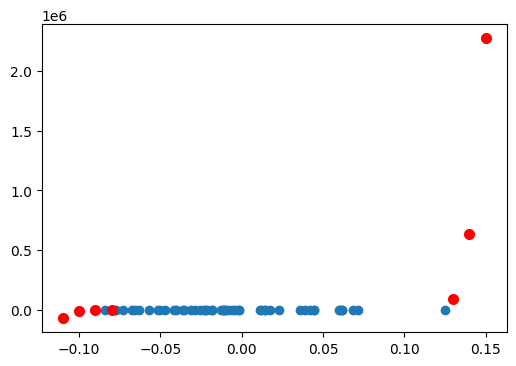

In [38]:
# graficar los puntos azules
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
plt.scatter(X, df_y[:N])

valores_nuevos = np.array([-0.11,-0.10, -0.09,-0.08, 0.13, 0.14, 0.15]) # puede probar otros valores y más si quiere.
X_nuevo = valores_nuevos.reshape(-1, 1)

y_estimado = np.polyval(np.flip(reg_poly.coef_[0]), X_nuevo) # realiza la predicción

plt.scatter(X_nuevo, y_estimado, color = 'red', linewidth = 2)


##Recomendamos cambiar la variable a estudiar.

## También recomendamos cambiar el grado del polinomio. Vea como cambia la curva y las métricas de rendimiento.

**Bibliografía**

Introduction to Machine Learning with Python: A Guide for Data Scientists libro

Python Data Science Handbook by Jake VanderPlas libro

Linear Models with R by Julian J.Faraway libro

An Introduction to Statistical Learning: with Applications in R (Springer Texts in Statistics) libro

OpenIntro Statistics: Fourth Edition by David Diez, Mine Çetinkaya-Rundel, Christopher Barr libro

Points of Significance Principal component analysis by Jake Lever, Martin Krzywinski & Naomi Altman